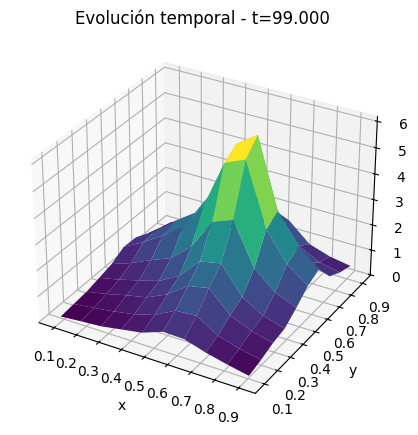

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# --- Leer datos ---
file_path = "../resultados_2D/TDSE/evolucion_completa.txt"  # Cambia a tu ruta
data = np.loadtxt(file_path)

# Columnas: t, x, y, valor (puede ser ψ o |ψ|²)
t = data[:, 0]
x = data[:, 1]
y = data[:, 2]
psi = data[:, 3]

# --- Encontrar tiempos únicos ---
times = np.unique(t)

# --- Crear malla para graficar ---
Nx = len(np.unique(x))
Ny = len(np.unique(y))

# --- Función para extraer datos de un tiempo ---
def get_frame_data(t_val):
    mask = t == t_val
    X = x[mask].reshape(Nx, Ny)
    Y = y[mask].reshape(Nx, Ny)
    Z = psi[mask].reshape(Nx, Ny)  # Usa |psi|² si corresponde
    return X, Y, Z

# --- Configuración de la figura ---
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = get_frame_data(times[0])
surf = [ax.plot_surface(X, Y, Z, cmap="viridis")]

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('|ψ|²')
ax.set_title(f"Evolución temporal - t={times[0]}")

# --- Función de actualización para la animación ---
def update(frame):
    ax.clear()
    X, Y, Z = get_frame_data(times[frame])
    ax.plot_surface(X, Y, Z, cmap="viridis")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('|ψ|²')
    ax.set_title(f"Evolución temporal - t={times[frame]:.3f}")
    return ax,

# --- Crear animación ---
ani = animation.FuncAnimation(fig, update, frames=len(times), blit=False)

# Guardar como GIF (necesitas instalar ImageMagick o Pillow)
ani.save("evolucion_TDSE.gif", writer='pillow', fps=3)

plt.show()


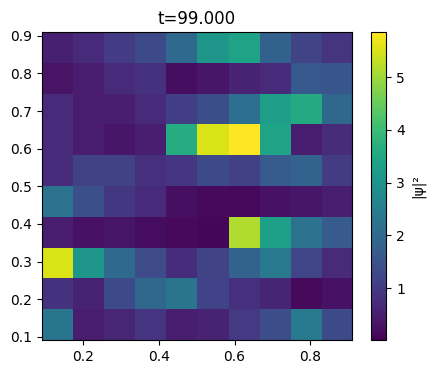

In [6]:

t = data[:,0]; x = data[:,1]; y = data[:,2]; psi = data[:,3]
idx_sort = np.argsort(t); t=t[idx_sort]; x=x[idx_sort]; y=y[idx_sort]; psi=psi[idx_sort]
times = np.unique(t)
Nx = len(np.unique(x[t==times[0]]))
Ny = len(np.unique(y[t==times[0]]))

fig, ax = plt.subplots(figsize=(5,4))
X = x[t==times[0]].reshape(Nx,Ny)
Y = y[t==times[0]].reshape(Nx,Ny)
im = ax.imshow(psi[t==times[0]].reshape(Nx,Ny),
               extent=[X.min(),X.max(),Y.min(),Y.max()],
               origin='lower', cmap='viridis', aspect='auto')
ax.set_title(f"t={times[0]:.3f}")
plt.colorbar(im, ax=ax, label='|ψ|²')

def update(frame):
    Z = psi[t==times[frame]].reshape(Nx,Ny)
    im.set_array(Z)
    ax.set_title(f"t={times[frame]:.3f}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(times), blit=True)
ani.save("evolucion_TDSE_heatmap.gif", writer='pillow', fps=5)
plt.show()
